<a href="https://colab.research.google.com/github/mqquiroz/ICH3424/blob/master/Ayudantia_4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Ayudantía 4 - Ingeniería de Costas - ICH3424

## Metodo de Runge-Kutta de 4to Orden (RK4)

La idea general de los Métodos de Runge-Kutta es sustituir el Problema de Valor Inicial:

$$\left.\begin{array}{l}
y^{\prime}=f(x, y) \\
y\left(x_{0}\right)=y_{0}
\end{array}\right\}$$

por la ecuación integral equivalente:

$$\int_{y_{0}}^{y} d y=\int_{x_{0}}^{x} f(x, y(x)) d x \Rightarrow y=y_{0}+\int_{x_{0}}^{x} f(x, y(x)) dx$$

### Método de Runge-Kutta de 4to orden

El Método de cuarto orden más habitual es el determinado por las fórmulas siguientes:

$$\begin{aligned}
k_{1}   &= f\left(x_{n}, y_{n}\right) \\
k_{2}   &= f\left(x_{n}+\frac{h}{2}, y_{n}+\frac{1}{2}k_{1}h \right) \\
k_{3}   &= f\left(x_{n}+\frac{h}{2}, y_{n}+\frac{1}{2}k_{2}h \right) \\
k_{4}   &= f\left(x_{n}+h, y_{n}+hk_{3}\right) \\
x_{n+1} &= x_{n} + h  \\
y_{n+1} &= y_{n}+\frac{h}{6}\left(k_{1}+2 k_{2}+2 k_{3}+k_{4}\right)
\end{aligned}$$

## Ejercicio 1: Simple EDO (RK4)

Ejercicio sencillo resolviendo EDO con condiciones iniciales usando Runge-Kutta de 4to Orden (RK4).

$$\left\{\begin{align}
\frac{dy}{dx} & = xy\\ \\
y(0)          & =2
\end{align}\right.$$

Resolviendo analíticamente:

$$\begin{align}
\frac{dy}{dx}    & = xy\\
\frac{dy}{y}     & = x\cdot dx\\
\int\frac{dy}{y} & = \int x\cdot dx\\
\ln(y)+C_{1}     & = \frac{x^{2}}{2}+C_{2}\\
\ln(y)           & = \frac{x^{2}}{2}+C_{3}\\
y                & = e^{\frac{x^{2}}{2}+C_{3}}\\
y                & = \underbrace{e^{C_{3}}}_{C} \cdot e^{\frac{x^{2}}{2}}\\
y                & = C \cdot e^{\frac{x^{2}}{2}}
\end{align}$$

Aplicando la condición inicial:

$$y(x=0)=2=C \cdot e^{\frac{0^{2}}{2}} \Rightarrow C =2$$

Así, la solución analítica es:


$$y = 2\cdot e^{\frac{x^{2}}{2}}$$


In [4]:
# Librerias
import numpy as np
import matplotlib.pyplot as plt

In [5]:
#Inputs
dx   = 0.005
xmax = 1.0

x_sol = np.arange(0,xmax+dx,dx)
y_analitico = 2*np.exp(0.5*(x_sol**2))

#RK4
# paso en x
h = 0.25
n_pasos = int(xmax/h)+ 1

f = lambda x,y: x*y

# Condiciones iniciales
x0 = 0.0
y0 = 2.0

x     = np.zeros(n_pasos)
y_num = np.zeros(n_pasos)

x[0]     = x0
y_num[0] = y0




In [6]:
#RK4
for i in range(n_pasos-1):
  k1 = f(x[i],y_num[i])
  k2 = f(x[i]+(0.5*h),y_num[i]+(h*0.5*k1))
  k3 = f(x[i]+(0.5*h),y_num[i]+(h*0.5*k2))
  k4 = f(x[i]+h,y_num[i]+h*k3)

  x[i+1]     = x[i] + h
  y_num[i+1] = y_num[i] + (h/6)*(k1 + 2*k2 + 2*k3 + k4)

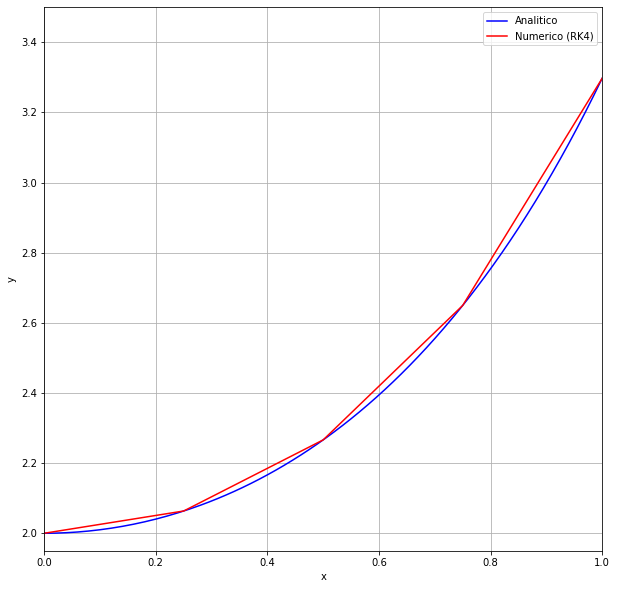

In [7]:
plt.figure(figsize=(10,10))
plt.plot(x_sol,y_analitico,'b',label='Analitico')
plt.plot(x,y_num,'r',label='Numerico (RK4)')
plt.grid()

plt.ylabel('y')
plt.xlabel('x')
plt.legend()
plt.xlim(0,xmax)
plt.ylim(1.95,3.5)
plt.show()


### Sistemas de EDO - RK4

Comencemos con el Método RK4 aplicado a un sistema de dos ecuaciones de
primer orden:

$$\left.\begin{array}{rl}
\displaystyle\frac{dx}{dt} & =f_{1}(t, x, y) \\
\displaystyle\frac{dy}{dt} & =f_{2}(t, x, y) \\
x(0) & = x_{0} \\
y(0) & = y_{0}
\end{array}\right\}$$

La extensión natural del método ya expuesto nos conduce a las expresiones:

$$\begin{aligned}
k_{1}   &= f_{1}\left(t_{n},x_{n}, y_{n}\right) \\[0.5ex]
l_{1}   &= f_{2}\left(t_{n},x_{n}, y_{n}\right) \\[0.5ex]
k_{2}   &= f_{1}\left(t_{n}+\frac{h}{2},x_{n}+\frac{1}{2}k_{1}h ,y_{n}+\frac{1}{2}l_{1}h\right) \\[0.5ex]
l_{2}   &= f_{2}\left(t_{n}+\frac{h}{2},x_{n}+\frac{1}{2}k_{1}h ,y_{n}+\frac{1}{2}l_{1}h\right) \\[0.5ex]
k_{3}   &= f_{1}\left(t_{n}+\frac{h}{2},x_{n}+\frac{1}{2}k_{2}h,y_{n}+\frac{1}{2}l_{2}h\right) \\[0.5ex]
l_{3}   &= f_{2}\left(t_{n}+\frac{h}{2},x_{n}+\frac{1}{2}k_{2}h,y_{n}+\frac{1}{2}l_{2}h\right) \\[0.5ex]
k_{4}   &= f_{1}\left(t_{n}+h,x_{n}+k_{3}h ,y_{n}+l_{3}h\right) \\[0.5ex]
l_{4}   &= f_{2}\left(t_{n}+h,x_{n}+k_{3}h ,y_{n}+l_{3}h\right) \\[0.5ex]
t_{n+1} &= t_{n} + h  \\[0.5ex]
x_{n+1} &= x_{n}+\frac{h}{6}\left(k_{1}+2 k_{2}+2 k_{3}+k_{4}\right) \\[0.5ex]
y_{n+1} &= y_{n}+\frac{h}{6}\left(l_{1}+2 l_{2}+2 l_{3}+l_{4}\right) 
\end{aligned}$$

## Ejercicio 2: Péndulo Simple - Sistemas de EDO - RK4

### Pendulo Simple

La ecuación de movimiento para el péndulo simple viene dada por:

$$\frac{d^{2} \theta}{d t^{2}}=\frac{g}{l} \sin (\theta)$$

donde $g$ es la aceleración debida a la gravedad y $l$ es la longitud del péndulo. Ésta es una ecuación no lineal y no se puede resolver de forma específica excepto en el caso de pequeñas oscilaciones en las que se realiza la aproximación $\sin(\theta)\approx\theta$. La solución de la ecuación lineal es

$$\theta=a * \sin (\beta t+\phi)$$

Donde $a$ y $\phi$ son arbitrarias, y $\beta=\sqrt{\frac{g}{l}}$

También es útil considerar un péndulo impulsado amortiguado (damped driven pendulum), con amortiguación proporcional a la velocidad angular y una fuerza impulsora armónica (harmonic driving force). Las ecuaciones de movimiento se pueden escribir como dos ecuaciones diferenciales de primer orden para el caso no linealizado:

$$\begin{aligned}
\frac{d \theta}{d t} & = \omega \\
\frac{d \omega}{d t} & = -\beta^{2}\sin(\theta) - k\omega + A\cos(\Omega)
\end{aligned}$$

Aquí, $k$ es un coeficiente de amortiguamiento (damping), $A$ es la amplitude impulsora (driving), y $\Omega$ es la frecuencia impulsora (driving). Para el caso lineal se reemplaza $\sin(\theta)$ con $\theta$.

Podemos asumir los siguientes parámetros para resolver el problema:

- $k = 0.25 [1/s]$
- $A = 0.0 [1/s^{2}]$
- $\Omega = 0.6667 [rad]$
- $\beta = 1.0 [1/s]$

Las condiciones iniciales son:

$$\theta(0) = 30º $$
$$\omega(0) = 0 $$

In [8]:
# inputs
k = 0.25
A = 0.0
omega = 0.6667
beta  = 1

f1 = lambda t,theta,w: w 
f2 = lambda t,theta,w: (-beta**2)*np.sin(theta) - k*w + A*np.cos(omega)

# CI
theta0 = 30*(np.pi/180)
w0     = 0

h = 0.25 # (s)
tmax = 35 #(s)
n_pasos = np.int(tmax/h)+1

# vectores solucion
t_num     = np.zeros(n_pasos)
theta_num = np.zeros(n_pasos)
w_num     = np.zeros(n_pasos)

theta_num[0] = theta0
w_num[0]     = w0 


In [9]:
#RK4
for i in range(n_pasos-1):
  k1 = f1(t_num[i],theta_num[i],w_num[i])
  l1 = f2(t_num[i],theta_num[i],w_num[i])

  k2 = f1(t_num[i]+ (0.5*h),theta_num[i]+(0.5*h*k1),w_num[i]+(0.5*h*l1))
  l2 = f2(t_num[i]+ (0.5*h),theta_num[i]+(0.5*h*k1),w_num[i]+(0.5*h*l1))

  k3 = f1(t_num[i]+ (0.5*h),theta_num[i]+(0.5*h*k2),w_num[i]+(0.5*h*l2))
  l3 = f2(t_num[i]+ (0.5*h),theta_num[i]+(0.5*h*k2),w_num[i]+(0.5*h*l2))

  k4 = f1(t_num[i]+ h,theta_num[i]+(h*k3),w_num[i]+(h*l3))
  l4 = f2(t_num[i]+ h,theta_num[i]+(h*k3),w_num[i]+(h*l3))

  t_num[i+1]     = t_num[i] + h
  theta_num[i+1] = theta_num[i] + (h/6)*(k1 + 2.0*k2 + 2.0*k3 + k4)
  w_num[i+1] = w_num[i] + (h/6)*(l1 + 2.0*l2 + 2.0*l3 + l4)

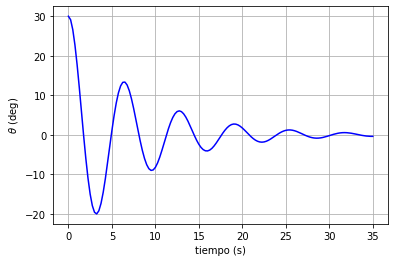

In [10]:
plt.plot(t_num,theta_num*(180/np.pi),'b')
plt.grid()
plt.xlabel('tiempo (s)')
plt.ylabel('$\\theta$ (deg)')
plt.show()

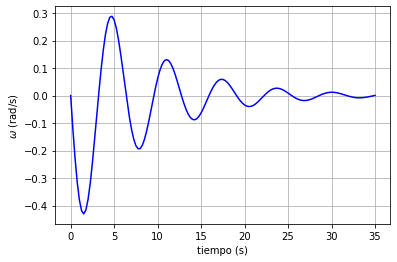

In [11]:
plt.plot(t_num,w_num,'b')
plt.grid()
plt.xlabel('tiempo (s)')
plt.ylabel('$\\omega$ (rad/s)')
plt.show()